**LETRA A**

Primeiro, vamos do mais simples possível no cenário em que não existe a regra da prisão

Matriz 40x40 que representa ir da casa i para casa j

Como o movimento é limitado a dois dados de 6 lados, o jogador só pode avançar para as casas i+n sendo n = 2, 3,..., 11, 12, lembrando que o tabuleiro é circular contendo 40 casas então a fórmula em python seria `(i+n)%40`, o operando % pega o resto da divisão pelo número escolhido que no caso é 40, então sempre contaremos com as casas devidamente contadas na operação de rolagem. As outras casas terão probabilidade igual a 0 porque não tem como chegar nelas em apenas uma jogada de dados.

Agora precisamos calcular a probabilidade de cada número sair nas jogadas de dado para determinar a probabilidade de cair na casa `(i+n)%40`:

N = Número tirado no dado

P(N=02) = [ (1,1) ] = 1/36

P(N=03) = [ (1,2), (2,1) ] = 2/36

P(N=04) = [ (1,3), (2,2), (3,1) ] = 3/36

P(N=05) = [ (1,4), (2,3), (3,2), (4,1) ] = 4/36

P(N=06) = [ (1,5), (2,4), (3,3), (4,2), (5,1) ] = 5/36

P(N=07) = [ (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) ] = 6/36

P(N=08) = [ (2,6), (3,5), (4,4), (5,3), (6,2) ] = 5/36

P(N=09) = [ (3,6), (4,5), (5,4), (6,3) ] = 4/36

P(N=10) = [ (4,6), (5,5), (6,4) ] = 3/36

P(N=11) = [ (5,6), (6,5) ] = 2/36

P(N=12) = [ (6,6) ] = 1/36

Por exemplo, se o jogadores estiver na casa 0, a probabilidade dele ir pra casa 4 é de 3/36.

Com isso, teremos nossa matriz de transição para o cenário simplificado sem a prisão, porém é insuficiente para o cenário que desejamos de fato.

Podemos usar um modelo contendo uma matriz de 123x123, cada casa do tabuleiro terá 3 estados: Sem delito, 1 delito e 2 delitos. (Delito sendo a quantidade vezes seguidas que os dados saíram iguais) Além de 3 casas para representar os estados na prisão. Podemos até dizer que essa cadeia de Markov tem como entrada a posição do jogador e a relação da última jogada de dados representada pelos status de cada casa.

Nesse modelo, números repetidos no dado não fazem o jogador se mover, ele é obrigado a jogar os dados novamente para determinar em que posição irá, entretanto quanto mais dados repetidos, mais delitos são cometidos e enfim a ida a prisão. Então nossa árvore de possibilidades para cada linha muda drasticamente:

N = Número tirado no dado em que o jogador pode se mover

R = Dados Repetidos

P(N=03) = [ (1,2), (2,1) ] = 2/36

P(N=04) = [ (1,3), (3,1) ] = 2/36

P(N=05) = [ (1,4), (2,3), (3,2), (4,1) ] = 4/36

P(N=06) = [ (1,5), (2,4), (4,2), (5,1) ] = 4/36

P(N=07) = [ (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) ] = 6/36

P(N=08) = [ (2,6), (3,5), (5,3), (6,2) ] = 4/36

P(N=09) = [ (3,6), (4,5), (5,4), (6,3) ] = 4/36

P(N=10) = [ (4,6), (6,4) ] = 2/36

P(N=11) = [ (5,6), (6,5) ] = 2/36

P(R) = [ (1,1), (2,2), (3,3), (4,4), (5,5), (6,6) ] = 6/36

Enquantos os eventos N o jogador se move para uma casa diferente, os eventos R fazem o jogador permanecer na mesma casa com a adição de um delito.

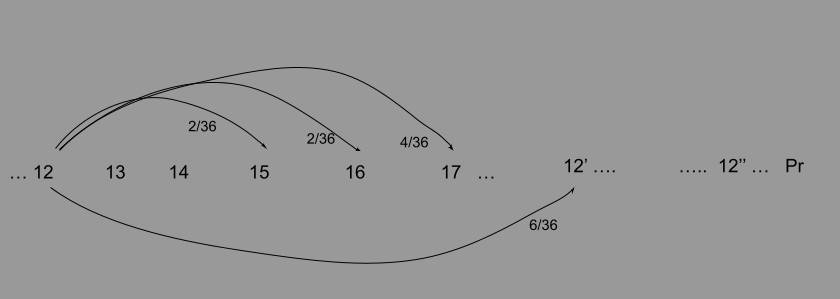

O jogador na casa 12 tem 1/6 de chance de cometer um delito e ter que jogar de novo, indo para a casa 12' da nossa matriz. Porém como os delitos não se acumulam após o jogador conseguir tirar números diferentes do dado, invés de ir para a casa 15', ele iria para a casa 15. O mesmo se aplicaria a casa 12".

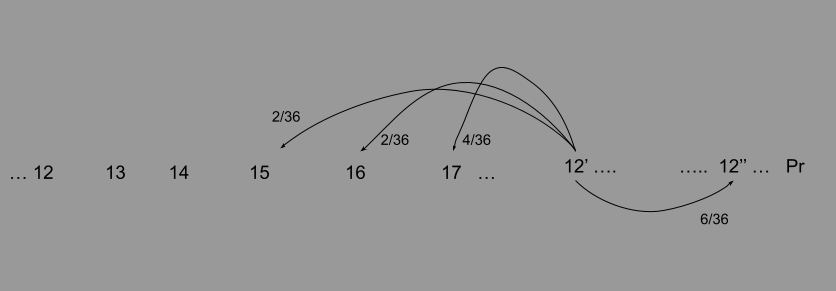

Entretanto, se o jogador cometer 3 delitos seguidos, ele irá pra casa da prisão na matriz (Pr), modulado como uma casa diferente pois as chances de mover dela são diferentes de uma casa normal.

A casa da prisão também possui 3 estados, cada uma representando quantas rodadas que o jogador está tentando sair dela. Como o jogador tem que tirar 2 números iguais no dado para sair (Fato engraçado: é preciso cometer um delito para sair mais cedo da prisão), ele tem 1/6 chance de sair da prisão mais cedo e 5/6 para continuar mais uma rodada preso lá. Essa probabilidade se repete na 1ª e na 2ª rodada preso, mas na 3ª a probabilidade de sair é de 1 pois independente dos valores da jogada de dado, a próxima rolagem de dados será para determinar em qual posição o jogador irá depois de ser solto. Nas regras, tem diferença pois ocorre em rodadas diferentes, mas nossa matriz não importa em que rodada o jogador está jogando, apenas a posição e o "estado" (quantos delitos cometidos ou quantas tentativas de sair da prisão)

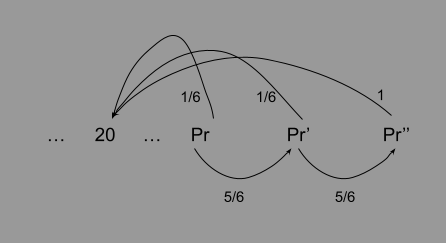

In [ ]:
import numpy as Np
import random

tamanhoTabuleiro = 40 #Constantes do código que podem ser alteradas a vontade
casaPrisao = 20

In [ ]:
def montaMatrizMarkov():
  tamanhoMarkov = (tamanhoTabuleiro*3) + 3
  markov = Np.zeros((tamanhoMarkov, tamanhoMarkov))
  for i in range(tamanhoMarkov):
    if(i < tamanhoTabuleiro*3):
      markov[i, (i+3)%tamanhoTabuleiro] = 2/36.0    #Casas que o jogador pode andar
      markov[i, (i+4)%tamanhoTabuleiro] = 2/36.0
      markov[i, (i+5)%tamanhoTabuleiro] = 4/36.0
      markov[i, (i+6)%tamanhoTabuleiro] = 4/36.0
      markov[i, (i+7)%tamanhoTabuleiro] = 6/36.0
      markov[i, (i+8)%tamanhoTabuleiro] = 4/36.0
      markov[i, (i+9)%tamanhoTabuleiro] = 4/36.0
      markov[i, (i+10)%tamanhoTabuleiro] = 2/36.0
      markov[i, (i+11)%tamanhoTabuleiro] = 2/36.0

      if(i < tamanhoTabuleiro*2):
        markov[i, i + tamanhoTabuleiro] = 6/36.0    #Casa de 1 delito e 2 delito
      else:
        markov[i, tamanhoMarkov - 3] = 6/36.0      #Casa do 1 estado da prisao 
    else:
      if((i == tamanhoMarkov - 3) or (i == tamanhoMarkov - 2)): #Casa da prisão estado 1 e 2
        markov[i, i + 1] = 5/6.0
        markov[i, casaPrisao] = 1/6.0
      else:
        markov[i, casaPrisao] = 1
  return markov

Infelizmente, a matriz é bem grande e vê-la totalmente pelo Google Collab fica complicado. A melhor forma que achei de apresentar é mostrar as informações formatadas de UMA linha desejada por vez usando a função abaixo para não lotar a caixa de texto do Google Collab

In [ ]:
def probabilidadeLinha(linha):
  markov = montaMatrizMarkov()
  if(linha < tamanhoTabuleiro*3): #Jogador Livre
    print("Jogador na casa " + str(linha%tamanhoTabuleiro))
    delitos = int(linha/tamanhoTabuleiro)
    print(str(delitos) + " delito(s) cometido(s)\n")
    for i in range((tamanhoTabuleiro*3)+1):
      if(markov[linha,i] != 0):
        prob = markov[linha,i]*100
        if(i < tamanhoTabuleiro):
          print("Probabilidade de ir pra casa " + str(i) + ": {:.2f}%".format(prob)) #Casa normal
        elif(i < tamanhoTabuleiro*2):
          print("Probabilidade de cometer o primeiro delito: {:.2f}%".format(prob)) #Casa 1 delito
        elif(i < tamanhoTabuleiro*3):
          print("Probabilidade de cometer o segundo delito: {:.2f}%".format(prob)) #Casa 2 delito
        else:
          print("Probabilidade de ir pra prisão: {:.2f}%".format(prob)) #Prisão

  else:                           #Jogador Preso
    print("Jogador na prisão na casa " + str(casaPrisao))
    tempoPrisao = int(linha%(tamanhoTabuleiro*3)) + 1
    print("Está a " + str(tempoPrisao) + " rodada(s) preso")
    if((linha == tamanhoTabuleiro*3) or (linha == tamanhoTabuleiro*3 + 1)): #Rodada 1 e 2 na prisão
      probSair = markov[linha, casaPrisao]*100
      probFicar = markov[linha, linha + 1]*100
      print("Probabilidade de sair da prisão: {:.2f}%".format(probSair))
      print("Probabilidade de continuar na prisão: {:.2f}%".format(probFicar))
    else:
      probSair = markov[linha, casaPrisao]*100                              #Ultima rodada na prisão
      print("Probabilidade de sair da prisão: {:.2f}%".format(probSair))


probabilidadeLinha(56)  #Coloque a linha desejada aqui

Jogador na casa 16
1 delito(s) cometido(s)

Probabilidade de ir pra casa 19: 5.56%
Probabilidade de ir pra casa 20: 5.56%
Probabilidade de ir pra casa 21: 11.11%
Probabilidade de ir pra casa 22: 11.11%
Probabilidade de ir pra casa 23: 16.67%
Probabilidade de ir pra casa 24: 11.11%
Probabilidade de ir pra casa 25: 11.11%
Probabilidade de ir pra casa 26: 5.56%
Probabilidade de ir pra casa 27: 5.56%
Probabilidade de cometer o segundo delito: 16.67%


Aqui embaixo tem um `for` para ver a situação de todas as linhas na mesma formatação acima, não recomendo o uso pela dificuldade da visualização do Google Collab, mas fique à vontade.

In [ ]:
for i in range((tamanhoTabuleiro*3)+3):
  probabilidadeLinha(i)
  print("\n\n")

**LETRA B**

In [ ]:
class JogadorClass:
  def __init__(self, posicao):
    self.posicao = posicao
    self.isPrison = False
    self.dadosRepetidosSeguidos = 0 #Usarei tbm para determinar as rodadas dentro da prisão

def jogaDado():
  return random.randint(1,6)

def rodada(jogador, printInfo):  #printInfo é um boolean pra mostrar texto ou não, tive problemas com mt texto desnecessário na Letra C
  if(jogador.isPrison):
    if(printInfo): print("Jogador está na prisão na casa " + str(casaPrisao))
  else:
    if(printInfo): print("Jogador na casa " + str(jogador.posicao))
  d1 = jogaDado()
  d2 = jogaDado()
  if(printInfo): print("Dados: [" + str(d1) + "] e [" + str(d2) + "]")
  if(jogador.isPrison): #Jogador preso
    if(d1 == d2 or jogador.dadosRepetidosSeguidos == 0):
      if(printInfo): print("Jogador está livre!")
      jogador.isPrison = False
      jogador.dadosRepetidosSeguidos = 0
      rodada(jogador, printInfo)
    else:
      jogador.dadosRepetidosSeguidos -= 1
      if(jogador.dadosRepetidosSeguidos == 0):
        if(printInfo): print("Jogador foi solto após cumprir sua pena")
        jogador.isPrison = False
      else:
        if(printInfo): print("Jogador continua preso...")
  else:                 #Jogador livre
    while(d1 == d2 and not jogador.isPrison):
      jogador.dadosRepetidosSeguidos += 1
      if(printInfo): print("Jogador cometeu um delito, jogue novamente")
      if(jogador.dadosRepetidosSeguidos == 3):
        jogador.isPrison = True
        jogador.posicao = casaPrisao
        if(printInfo): print("JOGADOR ESTÁ PRESO!")
      else:
        d1 = jogaDado()
        d2 = jogaDado()
        if(printInfo): print("Dados: [" + str(d1) + "] e [" + str(d2) + "]")
    if(not jogador.isPrison):
      jogador.dadosRepetidosSeguidos = 0
      jogador.posicao = (d1 + d2 + jogador.posicao)%tamanhoTabuleiro
      if(printInfo): print("Jogador avança para casa " + str(jogador.posicao))

def partida(jogador, numRodadas):
  for i in range(numRodadas):
    print("RODADA #" + str(i + 1))
    rodada(jogador, True)
    print("\n")

In [ ]:
jogador = JogadorClass(0) #Jogador começa na casa 0
numRodadas = 100
partida(jogador, numRodadas)

**LETRA C e D**

**CUIDADO O CÓDIGO ABAIXO LEVA MAIS DE 1 MINUTO PARA RODAR**


In [ ]:
numPartidas = 100000

def aproximacaoPrisao(numPartidas):
  soma = 0    #soma todos os valores de rodada para calcular a média no final
  for i in range(numPartidas):
    count = 0
    jogador = JogadorClass(0)
    while(not jogador.isPrison):
      rodada(jogador, False)
      count += 1
    soma += count
  return soma/numPartidas

aproximacaoPrisao(numPartidas)

215.26916

Eu apenas calculei a média de prisões de 100 mil partidas algumas vezes e descobri que leva aproximadamente 216 rodadas para ser preso. O metódo da média pode ter um erro de aproximação grande se usado uma quantidade de dados pequena onde os números são bem dispersos, porém se usarmos uma grande quantidade de dados, podemos diminuir significamente o valor do erro e chegar numa valor mais preciso.

**LETRA E**

In [ ]:
def casaMaisVisitada(numRodadas):
  numVisitas = Np.zeros(tamanhoTabuleiro)
  jogador = JogadorClass(0)
  for i in range(numRodadas):
    rodada(jogador, False)
    numVisitas[jogador.posicao] += 1
  return Np.argmax(numVisitas)
    
numRodadas = 1000000
casaMaisVisitada(numRodadas)

20

Após alguns testes com partidas longas, a casa que o jogador mais passa tempo é a casa 20, a da prisão. Como é uma casa que pode ser acessada em qualquer ponto do tabuleiro caso a pessoa cometa 3 delitos e o jogador passa de 1 a 3 rodadas presa nela, era de se esperar que devido a regra da prisão essa seria a casa mais visitada do jogo. Enquanto isso, as outras casas se igualam em vezes visitadas quanto mais longo é a partida.